# GOES data from Laura 

1. In the GOES_Elena folder, there are subfolders named: YYYYDDDHH, or 4 digit year, 3 digit day of year, 2 digit hour. June 30th is day 181 of 2021 and July 1st is day 182. 
2. The individual files are named as follows: OR_ABI-L2-MCMIPC-M6_G17_s20211812056177_e20211812058550_c20211812059036.nc, where: 
OR_ABI-L2-MCMIPC-M6_G17_ : type of data, in this case radiances from the GOES-17 satellite
s20211812056177_: start time of scan, in form  YYYYDDDHHMMSS, where MM is 2 digit minute and SS is 2 digit second
e20211812058550_:  end time of scan, in form  YYYYDDDHHMMSS, where MM is 2 digit minute and SS is 2 digit second
c20211812059036:  CONUS file (created every 5 minutes), in form  YYYYDDDHHMMSS, where MM is 2 digit minute and SS is 2 digit second
.nc: it's an netCDF file
3. Each scan should be roughly 5 minutes apart 

OR_ABI-L2-MCMIPC-M3_G16_s20181781922189_e20181781924562_c20181781925075.nc

OR - Indicates the system is operational

ABI - Instrument type

L2 - Level 2 Data

MCMIP - Multichannel Cloud and Moisture Imagery products

c - CONUS file (created every 5 minutes).

M3 - Scan mode

G16 - GOES-16

sYYYYJJJHHMMSSZ - Scan start: 4 digit year, 3 digit day of year (Julian day), hour, minute, second, tenth second

eYYYYJJJHHMMSSZ - Scan end

cYYYYJJJHHMMSSZ - File Creation .nc - NetCDF file extension

In [1]:
#os.system("pip install -U matplotlib==3.2")


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date 
from datetime import time
from datetime import timedelta


import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt
import xarray
import scipy.stats as ss 
import metpy  # noqa: F401
import os

from pymatreader import read_mat
from mpl_toolkits.basemap import Basemap


In [3]:
# 256: error
# 0: working 
# 2: kernel interupted
# runs in terminal 
#os.system("conda list")
#os.system("conda update metpy")
#os.system("conda install -c conda-forge metpy=1.0.1")
#os.system("pip install pymatreader")
#os.system("pip install metpy")

### how to iterate through the data 
- folder names, each file has a time window 
- go into the file and find time window

1. define time interval: july 1st 0 z 0 min - 5 min, define as datetime
2. go to july 1st 0z folder and list everything
3. index the data file name, extract the start time and end time, compare to wanted date time 
- could also do by center time comparison 
- index str(1:24) etc. 

## trying to use for loop to import data

In [4]:
# GOES_Elena file is in data file of PyroCb file 
# 202118120 is example file name 

year_day_hour = [202118120, 202118121, 202118122, 202118123, 202118200, 202118201, 202118202, 202118203, 202118204, 202118205, 202118206]
#start_end_middle = [OR_ABI-L2-MCMIPC-M6_G17_s20211812001177_e20211812003555_c20211812004037.nc, ]

file_folder = []
print(file_folder)
for i in range(len(year_day_hour)): 
    #path = 'elenadworak/home/PyroCb/data/GOES_Elena/'
    path_a = 'data/GOES_Elena/'
    file_a = (path_a + str(year_day_hour[i]) + "/")
    # print(file)
    file_folder.append(file_a)
print(file_folder)


[]
['data/GOES_Elena/202118120/', 'data/GOES_Elena/202118121/', 'data/GOES_Elena/202118122/', 'data/GOES_Elena/202118123/', 'data/GOES_Elena/202118200/', 'data/GOES_Elena/202118201/', 'data/GOES_Elena/202118202/', 'data/GOES_Elena/202118203/', 'data/GOES_Elena/202118204/', 'data/GOES_Elena/202118205/', 'data/GOES_Elena/202118206/']


## okay I am trying again... this time with os method

In [5]:
# path = '/home/data_analysis/netflix'

# files = os.listdir(path)

# for f in files:
# 	print(f)

path_b = 'data/GOES_Elena/202118201/'
file_b = os.listdir(path_b)

for f in file_b: 
    print(f)
    
# use a load command 

OR_ABI-L2-MCMIPC-M6_G17_s20211820111177_e20211820113550_c20211820114037.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820101177_e20211820103550_c20211820104040.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820106177_e20211820108561_c20211820109034.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820121177_e20211820123550_c20211820124037.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820116177_e20211820118550_c20211820119038.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820141177_e20211820143550_c20211820144040.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820126177_e20211820128550_c20211820129036.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820131177_e20211820133550_c20211820134039.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820136177_e20211820138556_c20211820139039.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820146177_e20211820148561_c20211820149036.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820151177_e20211820153550_c20211820154038.nc
OR_ABI-L2-MCMIPC-M6_G17_s20211820156177_e20211820158550_c20211820159040.nc


In [6]:
# checking the format and length as I go 
# print(file_folder)
# print(file_folder[0])
# print(len(file_folder))

# create empty array to add into 
subfolder_names = []

# loop through the base folders in file_folder, get all names within each folder, create new array 
for i in range(len(file_folder)): 
    #print(file_folder[i])
    path_c = file_folder[i]
    file_c = os.listdir(path_c)
    #print(subfolder_names)
    subfolder_names.append(file_c)
#print(subfolder_names)

## trying to load in as xarrays 

In [7]:
# path = 'data/GOES_Elena/202118201/'
# file = (path + "OR_ABI-L2-MCMIPC-M6_G17_s20211820101177_e20211820103550_c20211820104040.nc")
# goes_july1_hr0_min1 = xarray.open_dataset(file)
# goes_july1_hr0_min1

xarray_files = []
for i in range(len(file_folder)): 
    file_d = os.listdir(file_folder[i])
    for j in range(len(file_d)): 
        path_e = file_folder[i]
        file_e = (path_e + subfolder_names[i][j])
        #print(file_e)
        xarray_open = xarray.open_dataset(file_e)
        xarray_files.append(xarray_open)
    #xarray_files
    #return(xarray_files)
        

## using datetime for subfolder_names in for loop

In [8]:
for i in range(len(xarray_files)): 
    # Scan's start time, converted to datetime object
    scan_start = datetime.strptime(xarray_files[i].time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

    # Scan's end time, converted to datetime object
    scan_end = datetime.strptime(xarray_files[i].time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# taking outside of loop only prints last result 
    print('Scan Start    : {}'.format(scan_start))
    print('Scan End      : {}'.format(scan_end))
    print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2021-06-30 20:01:17.700000
Scan End      : 2021-06-30 20:03:55.500000
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:16:17.700000
Scan End      : 2021-06-30 20:18:55
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:21:17.700000
Scan End      : 2021-06-30 20:23:55.500000
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:11:17.700000
Scan End      : 2021-06-30 20:13:55
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:06:17.700000
Scan End      : 2021-06-30 20:08:55.500000
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:26:17.700000
Scan End      : 2021-06-30 20:28:56.100000
Scan Duration : 2.63 minutes
Scan Start    : 2021-06-30 20:41:17.700000
Scan End      : 2021-06-30 20:43:55
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:31:17.700000
Scan End      : 2021-06-30 20:33:55.500000
Scan Duration : 2.62 minutes
Scan Start    : 2021-06-30 20:36:17.700000
Scan End      : 2021-06-30 20:38:56.100000
Scan Duration :

## use datetime to import files

1. define center time: ie july 1st 0 z 0 min, define as datetime
2. go to july 1st 0z folder and list everything
3. index the data file name, extract the center time, compare to wanted date time
- index str(1:24) etc.


## working with a single file

In [9]:
path = 'data/GOES_Elena/202118201/'
file = (path + "OR_ABI-L2-MCMIPC-M6_G17_s20211820101177_e20211820103550_c20211820104040.nc")
goes_july1_hr0_min1 = xarray.open_dataset(file)
goes_july1_hr0_min1

# t coordinate: datetime64[ns]: array('2021-07-01T01:02:36.415388928', dtype='datetime64[ns]')


<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.06997 ... 0.06997
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2021-07-01T01:04:04.0Z
    time_coverage_start:       2021-07-01T01:01:17.7Z
    time_coverage_end:         2021-07-01T01:03:55.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        499e7208-0c39-4cbb-a087-69db90f1239f

In [10]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(goes_july1_hr0_min1.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(goes_july1_hr0_min1.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(goes_july1_hr0_min1.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

print('Scan Start    : {}'.format(scan_start))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2021-07-01 01:01:17.700000
Scan End      : 2021-07-01 01:03:55
File Created  : 2021-07-01 01:04:04
Scan Duration : 2.62 minutes


In [11]:
# Confirm that each band is the wavelength we are interested in
for band in [2, 3, 1]:
    print('{} is {:.2f} {}'.format(
        goes_july1_hr0_min1['band_wavelength_C{:02d}'.format(band)].long_name,
        float(goes_july1_hr0_min1['band_wavelength_C{:02d}'.format(band)][0]),
        goes_july1_hr0_min1['band_wavelength_C{:02d}'.format(band)].units))

ABI band 2 central wavelength is 0.64 um
ABI band 3 central wavelength is 0.87 um
ABI band 1 central wavelength is 0.47 um


In [12]:
R = goes_july1_hr0_min1['CMI_C02'][:]
G = goes_july1_hr0_min1['CMI_C03'][:]
B = goes_july1_hr0_min1['CMI_C01'][:]
print(R)

<xarray.DataArray 'CMI_C02' (y: 1500, x: 2500)>
[3750000 values with dtype=float32]
Coordinates:
    t        datetime64[ns] 2021-07-01T01:02:36.415388928
  * y        (y) float32 0.1282 0.1282 0.1281 0.128 ... 0.04438 0.04432 0.04427
  * x        (x) float32 -0.06997 -0.06992 -0.06986 ... 0.06986 0.06992 0.06997
    y_image  float32 0.08624
    x_image  float32 0.0
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  12
    downsampling_method:    average
    valid_range:            [   0 4095]
    units:                  1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: sum (interval: 0.000014 rad)
    ancillary_variables:    DQF_C02


In [13]:
# Apply range limits for each channel. RGB values must be between 0 and 1

R = np.clip(R, 0, 1)
G = np.clip(G, 0, 1)
B = np.clip(B, 0, 1)
print(R)

<xarray.DataArray 'CMI_C02' (y: 1500, x: 2500)>
array([[0.44190434, 0.44158688, 0.43333292, ..., 0.04317456, 0.0428571 ,
        0.04317456],
       [0.44031703, 0.44317418, 0.4269837 , ..., 0.04317456, 0.0428571 ,
        0.04317456],
       [0.44444403, 0.43238053, 0.40761867, ..., 0.0428571 , 0.0428571 ,
        0.04222218],
       ...,
       [0.13999987, 0.14190462, 0.142857  , ..., 0.0253968 , 0.02412696,
        0.02888886],
       [0.13650781, 0.13968241, 0.14412685, ..., 0.01999998, 0.02095236,
        0.01999998],
       [0.13523796, 0.1333332 , 0.13396813, ..., 0.01873014, 0.02031744,
        0.01999998]], dtype=float32)
Coordinates:
    t        datetime64[ns] 2021-07-01T01:02:36.415388928
  * y        (y) float32 0.1282 0.1282 0.1281 0.128 ... 0.04438 0.04432 0.04427
  * x        (x) float32 -0.06997 -0.06992 -0.06986 ... 0.06986 0.06992 0.06997
    y_image  float32 0.08624
    x_image  float32 0.0


In [14]:
# Apply a gamma correction to the image to correct ABI detector brightness
# takes everying in each array and raises it to 1/gamma 
# control image so it isn't too dark 

gamma = 2.2
R = np.power(R, 1/gamma)
G = np.power(G, 1/gamma)
B = np.power(B, 1/gamma)
print(R)

<xarray.DataArray 'CMI_C02' (y: 1500, x: 2500)>
array([[0.6898991 , 0.6896738 , 0.683784  , ..., 0.23968951, 0.2388868 ,
        0.23968951],
       [0.6887716 , 0.69079953, 0.6792117 , ..., 0.23968951, 0.2388868 ,
        0.23968951],
       [0.69169855, 0.68310046, 0.6650323 , ..., 0.2388868 , 0.2388868 ,
        0.23727159],
       ...,
       [0.40914398, 0.41166493, 0.41291848, ..., 0.18832135, 0.18398139,
        0.19967881],
       [0.40447322, 0.40872204, 0.41458282, ..., 0.1689432 , 0.17255361,
        0.1689432 ],
       [0.4027586 , 0.40017015, 0.4010352 , ..., 0.16398019, 0.17015688,
        0.1689432 ]], dtype=float32)
Coordinates:
    t        datetime64[ns] 2021-07-01T01:02:36.415388928
  * y        (y) float32 0.1282 0.1282 0.1281 0.128 ... 0.04438 0.04432 0.04427
  * x        (x) float32 -0.06997 -0.06992 -0.06986 ... 0.06986 0.06992 0.06997
    y_image  float32 0.08624
    x_image  float32 0.0


In [15]:
# Calculate the "True" Green
# green "veggie" measures near-infared band sensitive to chlorophyll 
# will tone down green to get a true green 

G_true = 0.45 * R + 0.1 * G + 0.45 * B
G_true = np.clip(G_true, 0, 1)  # apply limits again, just in case.

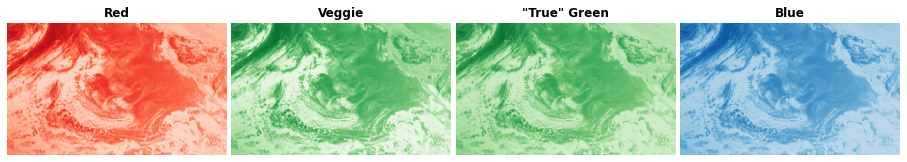

In [16]:
# First, plot each channel individually. The deeper the color means the satellite is observing more light in that channel. 
# Clouds appear white because they reflect lots of red, green, and blue light. 
# Notice that the land reflects a lot of “green” in the veggie channel because this channel is sensitive to the chlorophyll.

fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(16, 3))

ax1.imshow(R, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('Red', fontweight='bold')
ax1.axis('off')

ax2.imshow(G, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Veggie', fontweight='bold')
ax2.axis('off')

ax3.imshow(G_true, cmap='Greens', vmax=1, vmin=0)
ax3.set_title('"True" Green', fontweight='bold')
ax3.axis('off')

ax4.imshow(B, cmap='Blues', vmax=1, vmin=0)
ax4.set_title('Blue', fontweight='bold')
ax4.axis('off')

plt.subplots_adjust(wspace=.02)

(-0.5, 2499.5, 1499.5, -0.5)

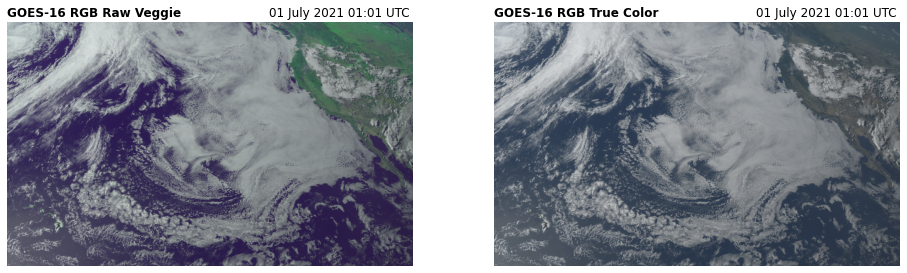

In [17]:
# The RGB array with the raw veggie band
RGB_veggie = np.dstack([R, G, B])

# The RGB array for the true color image
RGB = np.dstack([R, G_true, B])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The RGB using the raw veggie band
ax1.imshow(RGB_veggie)
ax1.set_title('GOES-16 RGB Raw Veggie', fontweight='bold', loc='left',
              fontsize=12)
ax1.set_title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')),
              loc='right')
ax1.axis('off')

# The RGB for the true color image
ax2.imshow(RGB)
ax2.set_title('GOES-16 RGB True Color', fontweight='bold', loc='left',
              fontsize=12)
ax2.set_title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')),
              loc='right')
ax2.axis('off')


In [18]:
# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.

dat = goes_july1_hr0_min1.metpy.parse_cf('CMI_C01')

#geos = dat.metpy.cartopy

# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
#dat = goes_tut.metpy.parse_cf('CMI_C01')

geos = dat.metpy.cartopy_crs

# We also need the x (north/south) and y (east/west) axis sweep of the ABI data
x = dat.x
y = dat.y


In [19]:
# fig = plt.figure(figsize=(15, 12))

# # Create axis with Geostationary projection
# ax = fig.add_subplot(1, 1, 1, projection=geos)

# # Add the RGB image to the figure. The data is in the same projection as the
# # axis we just created.
# ax.imshow(RGB, origin='upper',
#           extent=(x.min(), x.max(), y.min(), y.max()), transform=geos)

# # Add Coastlines and States
# ax.coastlines(resolution='50m', color='black', linewidth=0.25)
# ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)

# plt.title('GOES-16 True Color', loc='left', fontweight='bold', fontsize=15)
# plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), loc='right')

# plt.show()

In [20]:
# fig = plt.figure(figsize=(8, 8))

# pc = ccrs.PlateCarree()

# ax = fig.add_subplot(1, 1, 1, projection=pc)
# ax.set_extent([-114.75, -108.25, 36, 43], crs=pc)

# ax.imshow(RGB, origin='upper',
#           extent=(x.min(), x.max(), y.min(), y.max()),
#           transform=geos,
#           interpolation='none')

# ax.coastlines(resolution='50m', color='black', linewidth=1)
# ax.add_feature(ccrs.cartopy.feature.STATES)

# plt.title('GOES-16 True Color', loc='left', fontweight='bold', fontsize=15)
# plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), loc='right')

# plt.show()

## overlay of goes map and gld360 lightning

In [21]:
D = read_mat('data/2021-07-01-Bortnik.mat')
df_d = pd.DataFrame(D['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
july1 = df_d.loc[:, ~df_d.columns.isin(["j",  "k", "l", "m"])]

strikes1 = (july1.loc[(july1["lon"] > -122) & (july1["lon"] < -119) & (july1["lat"] > 48) & (july1["lat"] < 53) & (july1["peak-current"] != 0)])
strikes1



,year,month,day,hour,minute,second,lat,lon,peak-current
2,2021.0,7.0,1.0,0.0,0.0,2.635429,51.627081,-120.937201,-28.0
3,2021.0,7.0,1.0,0.0,0.0,2.696911,51.606372,-120.935466,-7.0
8,2021.0,7.0,1.0,0.0,0.0,6.283007,51.511094,-120.994370,4.0
17,2021.0,7.0,1.0,0.0,0.0,12.198432,51.598391,-120.974139,6.0
26,2021.0,7.0,1.0,0.0,0.0,21.403621,51.576698,-121.024436,-7.0
...,...,...,...,...,...,...,...,...,...
719518,2021.0,7.0,1.0,9.0,47.0,13.213554,51.067822,-121.296127,20.0
720470,2021.0,7.0,1.0,9.0,48.0,50.702342,51.082527,-121.296605,6.0
721207,2021.0,7.0,1.0,9.0,49.0,58.147225,51.095003,-121.297029,5.0
800728,2021.0,7.0,1.0,23.0,55.0,1.291642,50.309988,-119.003861,2.0


/tmp/ipykernel_179251/1560223527.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())


ValueError: conflicting sizes for dimension 'longitude': length 1500 on the data but length 60 on coordinate 'longitude'

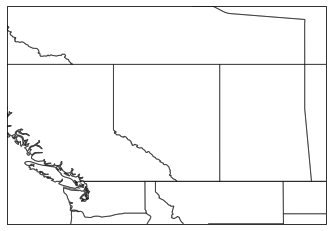

In [22]:
fig = plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())
ax.set_extent([-130, -100, 45, 65])

# do for lat and lon: np.arange(-130, -100, 0.5) --> resolution step
lon1 = np.arange(-130, -100, 0.5)
lat1 = np.arange(45, 65, 0.5)

# new data variable - will asign values of lon and lat from map 
# need spacial resolution of goes 
# if backwards if array is different orientation or order for lat long, may be mirrored. must transpose array 
# would transpose goes_july1_hr0_min1.CMI_C02[::-1,:] would transpose all x coord 
goes_newarray = xarray.DataArray(goes_july1_hr0_min1.CMI_C02, coords = [lon1, lat1], dims = ["longitude", "latitude"])


ax.imshow(RGB, origin='upper', extent=([-130, -100, 45, 65]), interpolation='none')#, transform=geos, )


# Make figure larger
plt.gcf().set_size_inches(20, 10)

strikes1_hour0 = strikes1[(strikes1["hour"] == 0.0)]
plt.scatter(x = strikes1_hour0["lon"], y = strikes1_hour0["lat"], c = strikes1_hour0["peak-current"], cmap="hot_r", s = strikes1_hour0["peak-current"], edgecolors="black", marker = 'o', alpha=0.5)


ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
plt.title("Lightning on July 1", fontsize = 18)
plt.savefig("Lightning on July 1", dpi = 200)
plt.show()



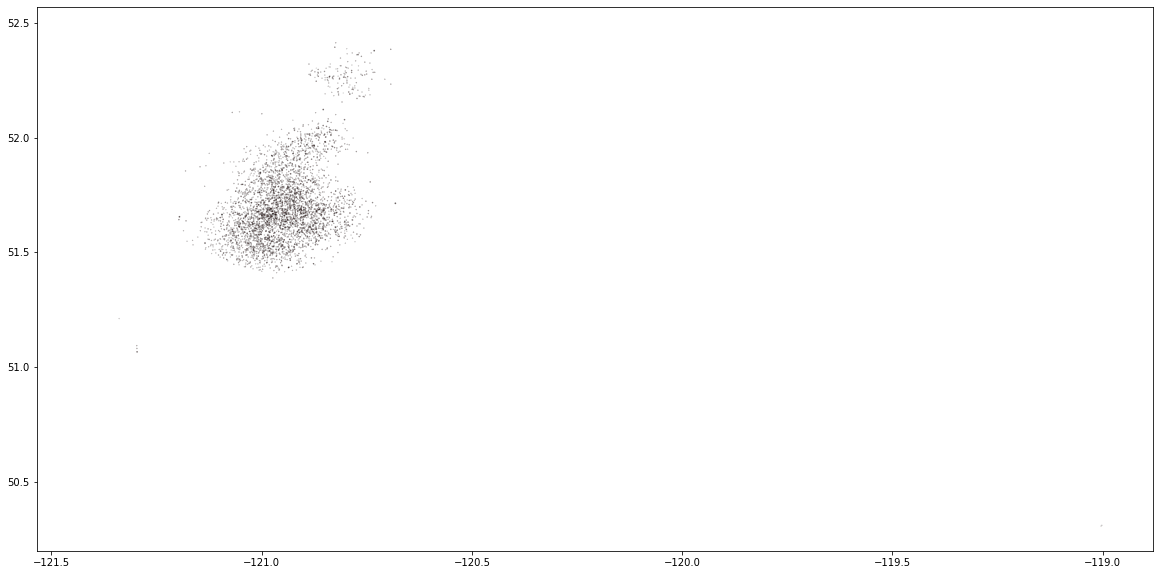

In [25]:
# The RGB array with the raw veggie band
RGB_veggie = np.dstack([R, G, B])

# The RGB array for the true color image
RGB = np.dstack([R, G_true, B])

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig = plt.figure(figsize=(10,10))

# ax1 = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.gcf().set_size_inches(20, 10)

plt.scatter(x = strikes1["lon"], y = strikes1["lat"], c = strikes1["peak-current"], cmap="hot_r", s = strikes1["peak-current"] * 0.02, edgecolors="black", marker = 'o', alpha=0.5)
ax.imshow(RGB_veggie)
ax.set_title('GOES-16 RGB Raw Veggie', fontweight='bold', loc='left',
              fontsize=12)
ax.set_title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')),
              loc='right')
ax.axis('off')
plt.savefig("energy1", dpi = 200)

plt.show()